# COMPGW02/M041: the Web Economics Project

## Group 7:  Yuncan Zhang
###  yuncan.zhang.16@ucl.ac.uk

In [875]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import seaborn as sns
import itertools

In [729]:
df_train_original = pd.read_csv('train.csv')
df_validation_original = pd.read_csv('validation.csv')
df_test_original = pd.read_csv('test.csv')

## Data Exploration

In [730]:
#win = pd.DataFrame()
#temp = pd.DataFrame()
#stats = pd.DataFrame()
#stats['Advertiser'] = np.sort(df_train_original.advertiser.unique())
#stats['Impressions'] = df_train_original.groupby('advertiser').size().values
#stats['Clicks'] = click.iloc[click.index.get_level_values('click') == 1].values
#click = df_train_original.groupby('advertiser').click.value_counts() 
#temp['Cost'] = (cost_click['payprice']).tolist()

#click_w = df_train_original.ix[( df_train_original['bidprice']>= df_train_original['payprice']) & (df_train_original['click']==1 )].groupby('advertiser')
#click2 = df_train_original.ix[( df_train_original['bidprice']>= df_train_original['payprice'])].groupby('advertiser')
#cost_click = click2.sum()[['click','payprice']]
### Cost
#stats['Cost'] = ((cost_click['payprice']/1000).round(1)).tolist()
#stats['CTR'] = (((stats.Clicks / stats.Impressions) * 100).round(3)).astype(str) + '%'
###eCPC
#stats['eCPC'] = ((temp.Cost / (stats.Clicks*1000 )).round(2)).astype(str)
###CPM
#win['Cost'] = df_train_original.groupby('advertiser').payprice.sum().values
#stats['CPM'] = (((win.Cost / stats.Impressions)).round(2)).astype(str)
#stats

### Basic Statistics

In [731]:
def basic_stats(df):
    win = pd.DataFrame()
    temp = pd.DataFrame()
    stats = pd.DataFrame()
    stats['Advertiser'] = np.sort(df.advertiser.unique())
    stats['Impressions'] = df.groupby('advertiser').size().values    
    click = df.groupby('advertiser').click.value_counts() 
    stats['Clicks'] = click.iloc[click.index.get_level_values('click') == 1].values
    click_w = df.ix[( df['bidprice']>= df['payprice']) & (df['click']==1 )].groupby('advertiser')
    click2 = df.ix[( df['bidprice']>= df['payprice'])].groupby('advertiser')
    cost_click = click2.sum()[['click','payprice']]
    temp['Cost'] = (cost_click['payprice']).tolist()
    ### Cost
    stats['Cost'] = ((cost_click['payprice']/1000).round(1)).tolist()
    stats['CTR'] = (((stats.Clicks / stats.Impressions) * 100).round(3)).astype(str) + '%'
    ###eCPC
    stats['eCPC'] = ((temp.Cost / (stats.Clicks*1000 )).round(2)).astype(str)
    ###CPM
    win['Cost'] = df.groupby('advertiser').payprice.sum().values
    stats['CPM'] = (((win.Cost / stats.Impressions)).round(2)).astype(str) 
    return stats

In [732]:
# train data statistics
train_stat = basic_stats(df_train_original)

In [733]:
train_stat

,Advertiser,Impressions,Clicks,Cost,CTR,eCPC,CPM
0,1458,209628,188,14464.5,0.09%,76.94,69.0
1,2259,57202,12,5326.3,0.021%,443.86,93.11
2,2261,46950,14,4201.4,0.03%,300.1,89.49
3,2821,89946,45,8013.2,0.05%,178.07,89.09
4,2997,21177,105,1326.7,0.496%,12.63,62.65
5,3358,118525,101,9538.5,0.085%,94.44,92.43
6,3386,194269,141,14937.4,0.073%,105.94,76.89
7,3427,176243,131,12949.0,0.074%,98.85,81.15
8,3476,134635,64,10213.4,0.048%,159.58,79.24


In [771]:
train_stat.to_csv('train_stat.csv', header=True, index_label='advertiserid')

### Validation Data

In [734]:
val_stats = basic_stats(df_validation_original)

In [735]:
val_stats

,Advertiser,Impressions,Clicks,Cost,CTR,eCPC,CPM
0,1458,60025,50,4139.2,0.083%,82.78,68.96
1,2259,16419,11,1519.7,0.067%,138.15,92.55
2,2261,13370,5,1196.2,0.037%,239.25,89.47
3,2821,25632,16,2281.5,0.062%,142.59,89.01
4,2997,6034,26,387.4,0.431%,14.9,64.2
5,3358,33853,27,2724.4,0.08%,100.9,92.34
6,3386,55196,33,4255.5,0.06%,128.95,77.1
7,3427,50381,45,3691.8,0.089%,82.04,80.93
8,3476,38839,13,2936.4,0.033%,225.88,78.85


In [772]:
val_stats.to_csv('val_stats.csv', header=True, index_label='advertiserid')

## User Feedback Analysis

### Analysis different features and CTR

In [736]:
df_train_original.columns

Index(['click', 'weekday', 'hour', 'bidid', 'logtype', 'userid', 'useragent',
       'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid',
       'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat',
       'slotprice', 'creative', 'bidprice', 'payprice', 'keypage',
       'advertiser', 'usertag'],
      dtype='object')

### 1. Analyze CTR by weekday

In [737]:

weekday_CTR =pd.DataFrame()
weekday_CTR['weekday'] = np.sort(df_train_original.weekday.unique())

click = df_train_original.groupby(['advertiser','weekday']).click.value_counts()

imp_ad1 = df_train_original.groupby('weekday').advertiser.value_counts()
imp_ad2 = df_train_original.groupby('weekday').advertiser.value_counts()

imp_ad1_cal = imp_ad1.iloc[imp_ad1.index.get_level_values('advertiser') == 1458].values 
imp_ad2_cal = imp_ad2.iloc[imp_ad2.index.get_level_values('advertiser') == 3358].values


click_ad1 = click.iloc[click.index.get_level_values('advertiser') == 1458]
click_ad2 = click.iloc[click.index.get_level_values('advertiser') == 3358]

click_ad1_cal = click_ad1.iloc[click_ad1.index.get_level_values('click') == 1].values
click_ad2_cal = click_ad2.iloc[click_ad2.index.get_level_values('click') == 1].values

weekday_CTR['CTR_ad1'] = ((click_ad1_cal/ imp_ad1_cal) * 100).round(3)
weekday_CTR['CTR_ad2'] = ((click_ad2_cal / imp_ad2_cal) * 100).round(3)

In [738]:
weekday_CTR

,weekday,CTR_ad1,CTR_ad2
0,0,0.082,0.077
1,1,0.093,0.042
2,2,0.081,0.039
3,3,0.098,0.114
4,4,0.107,0.119
5,5,0.088,0.087
6,6,0.079,0.054


(0.5, 7.5)

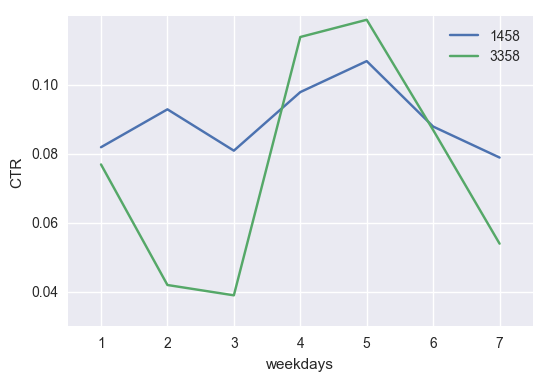

In [739]:
# 1. Line plot of CTR per weekday for advertiser 1458 & 3358
f, ax = plt.subplots(1)
ax.plot(1 + weekday_CTR.weekday.values, weekday_CTR.CTR_ad1.values, label='1458')
ax.plot(1 + weekday_CTR.weekday.values, weekday_CTR.CTR_ad2.values, label='3358')
plt.legend()
plt.ylabel('CTR')
plt.xlabel('weekdays')
ax.set_xlim(xmin = 0.5 , xmax = 7.5)

### 2. Analyzing CTR by adexchange 

In [740]:
adexchange_CTR =pd.DataFrame()
adexchange_CTR['adexchange'] = np.sort(df_train_original.adexchange.unique())

adexchange_click = df_train_original.groupby(['advertiser','adexchange']).click.value_counts()

adexchange_imp_ad1 = df_train_original.groupby('adexchange').advertiser.value_counts()
adexchange_imp_ad2 = df_train_original.groupby('adexchange').advertiser.value_counts()

adexchange_imp_ad1_cal = adexchange_imp_ad1.iloc[adexchange_imp_ad1.index.get_level_values('advertiser') == 1458].values 
adexchange_imp_ad2_cal = adexchange_imp_ad2.iloc[adexchange_imp_ad2.index.get_level_values('advertiser') == 3358].values


ad_click_ad1 = adexchange_click.iloc[adexchange_click.index.get_level_values('advertiser') == 1458]
ad_click_ad2 = adexchange_click.iloc[adexchange_click.index.get_level_values('advertiser') == 3358]

ad_click_ad1_cal = ad_click_ad1.iloc[ad_click_ad1.index.get_level_values('click') == 1].values
ad_click_ad2_cal = click_ad2.iloc[ad_click_ad2.index.get_level_values('click') == 1].values
adexchange_CTR = adexchange_CTR.drop([3,4])
adexchange_CTR['CTR_ad1'] = ((ad_click_ad1_cal/ adexchange_imp_ad1_cal) * 100).round(3)
adexchange_CTR['CTR_ad2'] = ((ad_click_ad1_cal / adexchange_imp_ad2_cal) * 100).round(3)

In [741]:
adexchange_CTR

,adexchange,CTR_ad1,CTR_ad2
0,1,0.088,0.100
1,2,0.082,0.140
2,3,0.098,0.372


### 2 (1 ) Bar plot of CTR per adexchange for advertiser 1458 & 3358

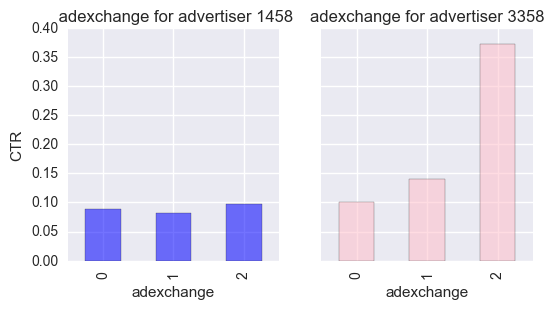

In [776]:
#Bar plot of CTR per adexchange for advertiser 1458 & 3358
pic=plt.figure(figsize=(6,3))
alpha_level = 0.55

pic1 = pic.add_subplot(1,2,1)

adexchange_CTR['CTR_ad1'].plot(kind='bar',color='blue', 
                  alpha=alpha_level)
#pic1.set_xticklabels(["1", "2", "3"], rotation=0)
plt.title(" adexchange for advertiser 1458")
plt.ylabel('CTR')
plt.xlabel('adexchange')


pic2 = pic.add_subplot(1,2,2,sharey=pic1)   #share the same y axis with `pic1`

adexchange_CTR['CTR_ad2'].plot(kind='bar',color='pink', alpha=alpha_level)
#pic2.set_xticklabels(["1", "2","3"], rotation=0)
plt.title("adexchange for advertiser 3358")
plt.xlabel('adexchange')

### 2 (2) Line plot of CTR per adexchange for advertiser 1458 & 3358

(0, 3.5)

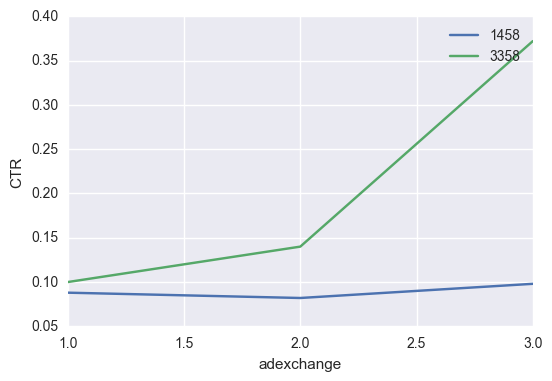

In [743]:

f1, ax1 = plt.subplots(1)
ax1.plot( adexchange_CTR.adexchange.values, adexchange_CTR.CTR_ad1.values, label='1458')
ax1.plot(adexchange_CTR.adexchange.values, adexchange_CTR.CTR_ad2.values, label='3358')
plt.legend()
plt.ylabel('CTR')
plt.xlabel('adexchange')
ax.set_xlim(xmin = 0 , xmax = 3.5)

In [744]:
#double_graph=plt.figure(figsize=(18,6))
#graph1 = double_graph.add_subplot(2,2,1)
#f, ax = plt.subplots(1,2,1)
#graph1.plot(1 + weekday_CTR.weekday.values, weekday_CTR.CTR_ad1.values, label='1458')
#graph1.plot(1 + weekday_CTR.weekday.values, weekday_CTR.CTR_ad2.values, label='3358')
#graph1.legend()
#plt.ylabel('CTR')
#plt.xlabel('weekdays')
#graph1.set_xlim(xmin = 1 , xmax = 7)

#f1, ax1 = plt.subplots(1,2,2)
#graph2 = double_graph.add_subplot(2,2,2)
#graph2.plot( adexchange_CTR.adexchange.values, adexchange_CTR.CTR_ad1.values, label='1458')
#graph2.plot(adexchange_CTR.adexchange.values, adexchange_CTR.CTR_ad2.values, label='3358')
#graph2.legend()
#plt.ylabel('CTR')
#plt.xlabel('adexchange')
#graph2.set_xlim(xmin = 1 , xmax = 3)

#graph2 = double_graph.add_subplot(2,2,3)


In [745]:
### 3. line plot of CTR per browser for advertiser 1458 & 3358

#df_1458 = df_train_original.ix[(df_train_original['advertiser']==1458)]
#df_3358 = df_train_original.ix[(df_train_original['advertiser']==3358)]

#u1 = df_1458.groupby(df_train_original['useragent'])
#u2 = df_3358.groupby(df_train_original['useragent'])

In [746]:
#df_train_original.columns

(1, 3)

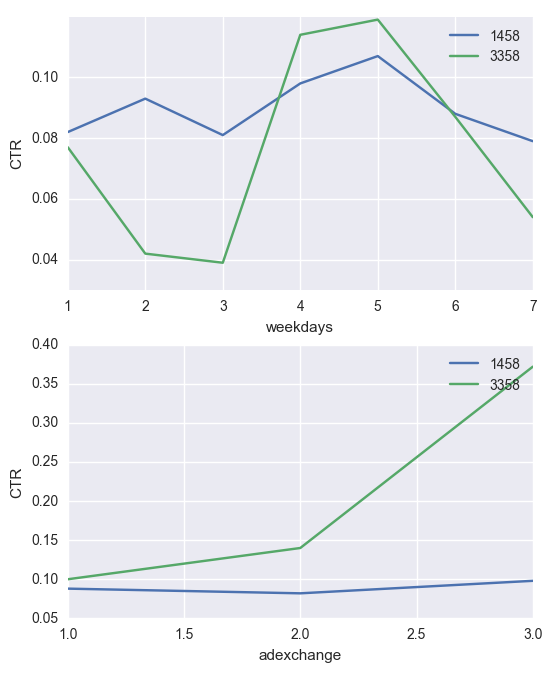

In [749]:
double_graph=plt.figure(figsize=(6,12))
graph1 = double_graph.add_subplot(3,1,1)
graph1.plot(1 + weekday_CTR.weekday.values, weekday_CTR.CTR_ad1.values, label='1458')
graph1.plot(1 + weekday_CTR.weekday.values, weekday_CTR.CTR_ad2.values, label='3358')
graph1.legend()
plt.ylabel('CTR')
plt.xlabel('weekdays')
graph1.set_xlim(xmin = 1 , xmax = 7)

graph2 = double_graph.add_subplot(3,1,2)
graph2.plot( adexchange_CTR.adexchange.values, adexchange_CTR.CTR_ad1.values, label='1458')
graph2.plot(adexchange_CTR.adexchange.values, adexchange_CTR.CTR_ad2.values, label='3358')
graph2.legend()
plt.ylabel('CTR')
plt.xlabel('adexchange')
graph2.set_xlim(xmin = 1 , xmax = 3)

### 3. region CTR

In [747]:
CTR_for_region = pd.DataFrame()
CTR_for_region['region'] = np.sort(df_train_original.region.unique())
## Click
click = df_train_original.groupby(['advertiser','region']).click.value_counts()

click_1458_re = click.iloc[click.index.get_level_values('advertiser') == 1458]
click_1458_re.iloc[click_1458_re.index.get_level_values('click') == 0]=0
click_1458_re_cal = click_1458_re.groupby(level='region').sum().values

click_3358_re = click.iloc[click.index.get_level_values('advertiser') == 1458]
click_3358_re.iloc[click_3358_re.index.get_level_values('click') == 0]=0
click_3358_re_cal = click_3358_re.groupby(level='region').sum().values

##Impression
imp_all = df_train_original.groupby('region').advertiser.value_counts()
imp_cal_1458_re = imp_all.iloc[imp_all.index.get_level_values('advertiser') == 1458].values 
imp_cal_3358_re = imp_all.iloc[imp_all.index.get_level_values('advertiser') == 3358].values

### CTR
CTR_for_region['CTR_1458'] = ((click_1458_re_cal / imp_cal_1458_re) * 100).round(3)
CTR_for_region['CTR_3358'] = ((click_3358_re_cal / imp_cal_3358_re) * 100).round(3)

In [918]:
# CTR_for_region

### 3. (1) Boxplot of CTR per region for advertiser 1458 & 3358

In [ ]:
pic_cpc=plt.figure(figsize=(8,4))
alpha_level = 0.55

pic1_cpc = pic_cpc.add_subplot(1,2,1)

CPC_w['eCPC_ad1'].plot(kind='bar', color='blue', 
                  alpha=alpha_level)
pic1_cpc.set_xticklabels(["1", "2", "3","4","5","6"], rotation=0)
plt.title(" eCPC of weekday for advertiser 1458")
plt.ylabel('eCPC')
plt.xlabel('weekday')


pic2_cpc = pic_cpc.add_subplot(1,2,2,sharey=pic1_cpc)

CPC_w['eCPC_ad2'].plot(kind='bar', color='pink', 
                  alpha=alpha_level)
pic2_cpc.set_xticklabels(["1", "2", "3","4","5","6"], rotation=0)
plt.title(" eCPC of weekday for advertiser 3358")
plt.ylabel('eCPC')
plt.xlabel('weekday')

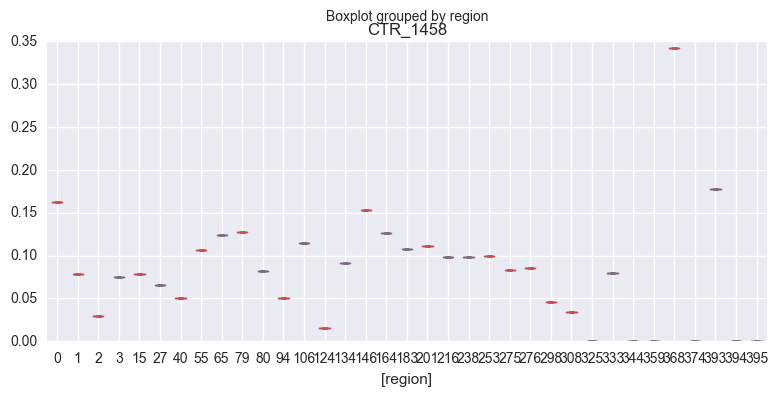

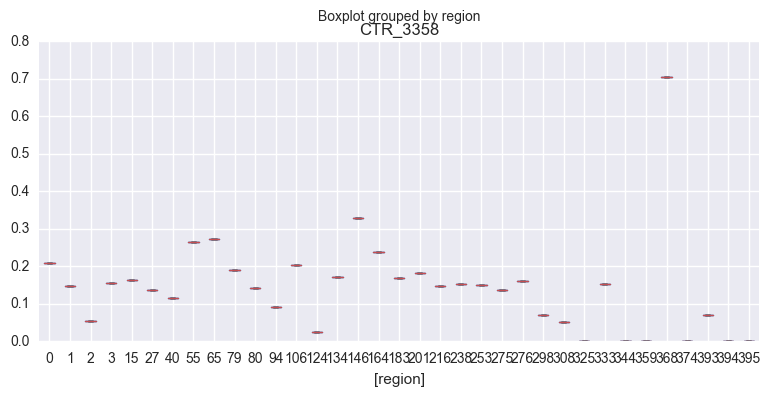

In [917]:
a1=CTR_for_region[['region','CTR_1458']]
ax1 = a1.boxplot(by='region', return_type='axes',figsize=(9,4))
a2 = CTR_for_region[['region','CTR_3358']]
a2.boxplot(by='region',figsize=(9,4))

### 3. (2) Line plot for region

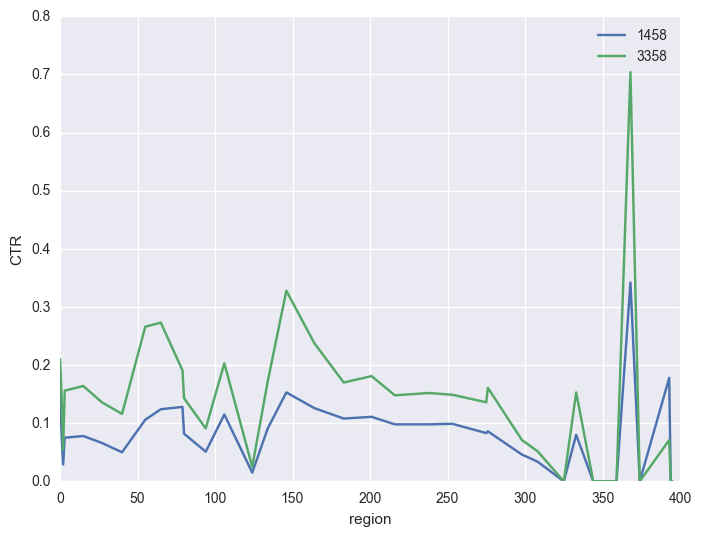

In [752]:
double_graph=plt.figure(figsize=(8,6))

graph3 = double_graph.add_subplot(1,1,1)
graph3.plot( CTR_for_region.region.values, CTR_for_region.CTR_1458.values, label='1458')
graph3.plot(CTR_for_region.region.values, CTR_for_region.CTR_3358.values, label='3358')
graph3.legend()
plt.ylabel('CTR')
plt.xlabel('region')

## Market price for bidding behaviour

### 4. Price and weekday

In [941]:
price_weekday = pd.DataFrame()
price_weekday['weekday'] = np.sort(df_train_original.weekday.unique())

price_ad1 = df_train_original.ix[(df_train_original['advertiser']==1458)]['payprice'].groupby(df_train_original['weekday'])
price_ad2 = df_train_original.ix[(df_train_original['advertiser']==3358)]['payprice'].groupby(df_train_original['weekday'])

price_weekday['Price_ad1'] = price_ad1.mean()
price_weekday['Price_ad2'] = price_ad2.mean()

In [943]:
price_weekday

,weekday,Price_ad1,Price_ad2
0,0,63.601872,89.218535
1,1,73.452977,92.922221
2,2,71.695172,96.803638
3,3,69.603626,86.977169
4,4,69.684635,97.413255
5,5,67.889437,97.349354
6,6,68.072630,90.072894


### 5. Price against Region

In [982]:
price_region = pd.DataFrame()
price_region['region'] = np.sort(df_train_original.region.unique())

price_ad1_region = df_train_original.ix[(df_train_original['advertiser']==1458)]['payprice'].groupby(df_train_original['region'])
price_ad2_region = df_train_original.ix[(df_train_original['advertiser']==3358)]['payprice'].groupby(df_train_original['region'])

price_region['Price_ad1'] = price_ad1_region.mean()
price_region['Price_ad2'] = price_ad2_region.mean()

In [997]:
#price_region

### 6.  Price against Hour

In [970]:
price_hour = pd.DataFrame()
price_hour['hour'] = np.sort(df_train_original.hour.unique())

price_ad1_hour = df_train_original.ix[(df_train_original['advertiser']==1458)]['payprice'].groupby(df_train_original['hour'])
price_ad2_hour = df_train_original.ix[(df_train_original['advertiser']==3358)]['payprice'].groupby(df_train_original['hour'])

price_hour['Price_ad1'] = price_ad1_hour.mean()
price_hour['Price_ad2'] = price_ad2_hour.mean()
price_hour

,hour,Price_ad1,Price_ad2
0,0,65.872601,111.424014
1,1,63.021043,80.575093
2,2,64.873218,73.732233
3,3,69.587758,71.337568
4,4,66.209795,73.520629
5,5,71.290684,72.599537
6,6,64.968348,100.954914
7,7,68.919923,77.513656
8,8,71.727546,81.570335
9,9,68.093714,78.610778


(0, 23)

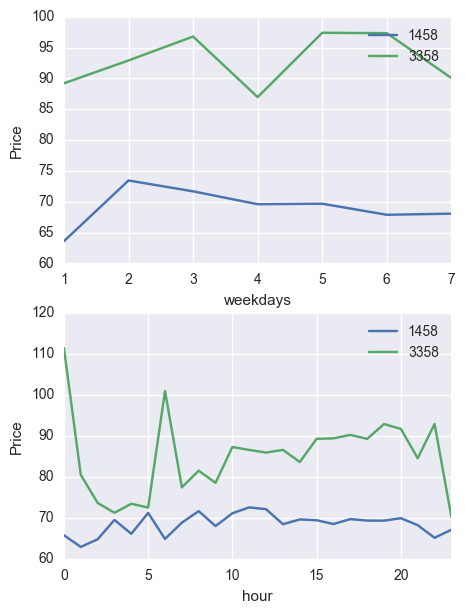

In [990]:
price_pic =plt.figure(figsize=(5,7))
graph1_price = price_pic.add_subplot(2,1,1)
graph1_price.plot(1 + price_weekday.weekday.values, price_weekday.Price_ad1.values, label='1458')
graph1_price.plot(1 + price_weekday.weekday.values, price_weekday.Price_ad2.values, label='3358')
graph1_price.legend()
plt.ylabel('Price')
plt.xlabel('weekdays')
graph1_price.set_xlim(xmin = 1 , xmax = 7)

# graph2_price = price_pic.add_subplot(3,1,2)
# graph2_price.plot( price_region.region.values, price_region.Price_ad1.values, label='1458')
# graph2_price.plot(price_region.region.values, price_region.Price_ad2.values, label='3358')
# graph2_price.legend()
# plt.ylabel('Price')
# plt.xlabel('adexchange')

graph3_price = price_pic.add_subplot(2,1,2)
graph3_price.plot( price_hour.hour.values, price_hour.Price_ad1.values, label='1458')
graph3_price.plot(price_hour.hour.values, price_hour.Price_ad2.values, label='3358')
graph3_price.legend()
plt.ylabel('Price')
plt.xlabel('hour')
graph3_price.set_xlim(xmin = 0 , xmax = 23)

### 7. eCPC for weekday

In [842]:
CPC_w = pd.DataFrame()
CPC_w['weekday'] = np.sort(df_train_original.weekday.unique())

click = df_train_original.ix[(df_train_original['click']==1)]

click_ad1_cpc = click.ix[(df_train_original['advertiser']==1458)]
click_ad2_cpc = click.ix[(df_train_original['advertiser']==3358)]


click_ad1_cal_cpc = click_ad1_cpc['click'].groupby(df_train_original['weekday'])
click_ad2_cal_cpc = click_ad2_cpc['click'].groupby(df_train_original['weekday'])

cost_cal_ad1 = df_train_original['payprice'].groupby(df_train_original['weekday'].ix[(df_train_original['advertiser']==1458)])
cost_cal_ad2 = df_train_original['payprice'].groupby(df_train_original['weekday'].ix[(df_train_original['advertiser']==3358)])


eCPC_ad1 = (cost_cal_ad1.sum()/click_ad1_cal_cpc.sum())/1000
eCPC_ad2 = (cost_cal_ad2.sum()/click_ad2_cal_cpc.sum())/1000


CPC_w['eCPC_ad1'] = eCPC_ad1
CPC_w['eCPC_ad2'] = eCPC_ad2

In [843]:
CPC_w

,weekday,eCPC_ad1,eCPC_ad2
0,0,77.243296,115.332800
1,1,78.764192,222.214200
2,2,88.905130,246.123250
3,3,71.094103,76.085694
4,4,65.039719,82.155263
5,5,76.981593,111.907950
6,6,86.032458,166.815000


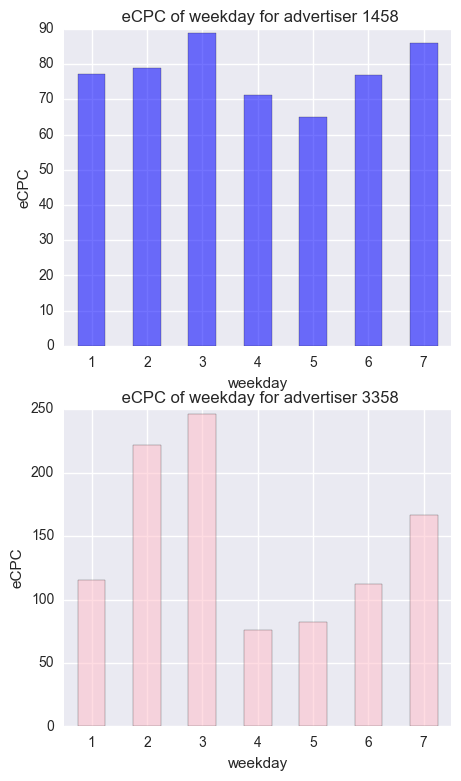

In [925]:
pic_cpc=plt.figure(figsize=(5,9))
alpha_level = 0.55

pic1_cpc = pic_cpc.add_subplot(2,1,1)

CPC_w['eCPC_ad1'].plot(kind='bar', color='blue', 
                  alpha=alpha_level)
pic1_cpc.set_xticklabels(["1", "2", "3","4","5","6","7"], rotation=0)
plt.title(" eCPC of weekday for advertiser 1458")
plt.ylabel('eCPC')
plt.xlabel('weekday')


pic2_cpc = pic_cpc.add_subplot(2,1,2)

CPC_w['eCPC_ad2'].plot(kind='bar', color='pink', 
                  alpha=alpha_level)
pic2_cpc.set_xticklabels(["1", "2", "3","4","5","6","7"], rotation=0)
plt.title(" eCPC of weekday for advertiser 3358")
plt.ylabel('eCPC')
plt.xlabel('weekday')

### 8. eCPC for region

In [867]:
CPC_re = pd.DataFrame()
CPC_re['hour'] = np.sort(df_train_original.hour.unique())

click_re = df_train_original.ix[(df_train_original['click']==1)]

click_ad1_cpc_re = click_re.ix[(df_train_original['advertiser']==1458)]
click_ad2_cpc_re = click_re.ix[(df_train_original['advertiser']==3358)]


click_ad1_cal_cpcRe = click_ad1_cpc_re['click'].groupby(df_train_original['hour'])
click_ad2_cal_cpcRe = click_ad2_cpc_re['click'].groupby(df_train_original['hour'])

cost_cal_ad1_re = df_train_original['payprice'].groupby(df_train_original['hour'].ix[(df_train_original['advertiser']==1458)])
cost_cal_ad2_re = df_train_original['payprice'].groupby(df_train_original['hour'].ix[(df_train_original['advertiser']==3358)])


eCPC_ad1_re = (cost_cal_ad1_re.sum()/click_ad1_cal_cpcRe.sum())/1000
eCPC_ad2_re = (cost_cal_ad2_re.sum()/click_ad2_cal_cpcRe.sum())/1000


CPC_re['eCPC_ad1'] = eCPC_ad1_re
CPC_re['eCPC_ad2'] = eCPC_ad2_re

In [868]:
CPC_re

,hour,eCPC_ad1,eCPC_ad2
0,0,65.200700,107.424276
1,1,275.528000,79.581333
2,2,33.669200,102.709000
3,3,94.361000,39.307000
4,4,30.191667,NaN
5,5,60.454500,NaN
6,6,131.366000,37.319667
7,7,95.247333,NaN
8,8,142.953000,85.241000
9,9,66.485000,NaN


### 9. eCPC against hour

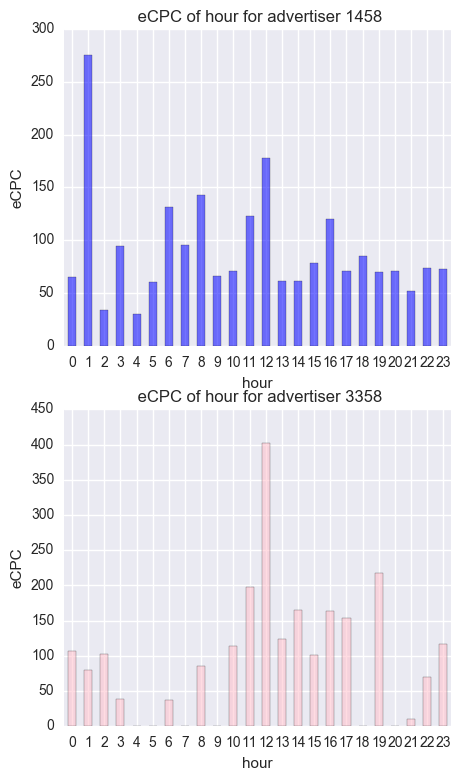

In [927]:
pic_cpc=plt.figure(figsize=(5,9))
alpha_level = 0.55
label = [i for i in range(0,24)]
pic1_cpc = pic_cpc.add_subplot(2,1,1)

CPC_re['eCPC_ad1'].plot(kind='bar', color='blue', 
                  alpha=alpha_level)
pic1_cpc.set_xticklabels(label, rotation=0)
plt.title(" eCPC of hour for advertiser 1458")
plt.ylabel('eCPC')
plt.xlabel('hour')


pic2_cpc = pic_cpc.add_subplot(2,1,2)

CPC_re['eCPC_ad2'].plot(kind='bar', color='pink', 
                  alpha=alpha_level)
pic2_cpc.set_xticklabels(label, rotation=0)
plt.title(" eCPC of hour for advertiser 3358")
plt.ylabel('eCPC')
plt.xlabel('hour')

# Group code

### Data Preprocess

### Split os and browser

In [759]:
# split os and browser
def split_useragent_os(data):
    return data.split('_')[0]
def split_useragent_b(data):
    return data.split('_')[1]
def split_useragent(dataframe):
    dataframe['os'] = dataframe['useragent'].apply(split_useragent_os)
    dataframe['browser'] = dataframe['useragent'].apply(split_useragent_b)
    dataframe.drop(['useragent'], axis=1, inplace=True)

split_useragent(df_train_original)
split_useragent(df_validation_original)
split_useragent(df_test_original)

### Drop features

In [777]:
col_to_drop1 = ['city','slotid','slotprice','IP','domain','usertag','creative','logtype','bidid','userid','url','urlid','bidprice','payprice','keypage']
# col_to_drop2 = ['IP','domain','usertag','creative','logtype','bidid','userid','url','urlid','bidprice','payprice','keypage']
test_to_drop = ['city','slotid','slotprice','IP','domain','usertag','creative','logtype','bidid','userid','url','urlid','keypage']

In [778]:
df_train = df_train_original.drop(col_to_drop1, axis=1)
df_validation = df_validation_original.drop(col_to_drop1, axis=1)
df_test = df_test_original.drop(test_to_drop, axis=1)

In [779]:
def onehot(onehot_df, column_name):
    dummies = pd.get_dummies(onehot_df[column_name],prefix=column_name)
    onehot_df = onehot_df.join(dummies)
    onehot_df = onehot_df.drop([column_name], axis=1)
    return onehot_df

In [780]:
column_to_onehot = ['weekday','hour','region','adexchange','slotformat','os','browser','slotwidth','slotheight','slotvisibility']
for col_name in column_to_onehot:
    df_train = onehot(df_train, col_name)
    df_validation = onehot(df_validation, col_name)
    df_test = onehot(df_test, col_name)

In [781]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn import metrics
model_list = {}
train_y = {}
train_X = {}
val_y = {}
val_X = {}
test_X = {}
auc = {}
for advertiser in df_train['advertiser'].unique():
    df_one_advertiser = df_train.ix[(df_train['advertiser']==advertiser)]
    df_one_advertiser_validation = df_validation.ix[(df_validation['advertiser']==advertiser)]
    df_one_advertiser_test = df_test.ix[(df_test['advertiser']==advertiser)]
    
    train_y[advertiser] = df_one_advertiser['click']
    val_y[advertiser] = df_one_advertiser_validation['click']
    train_X[advertiser] = df_one_advertiser.drop(['click','advertiser'], axis=1)
    val_X[advertiser] = df_one_advertiser_validation.drop(['click','advertiser'], axis=1)
    test_X[advertiser] = df_one_advertiser_test.drop(['advertiser'], axis=1)
    
    lr_instance = lr()
    lr_instance.fit(train_X[advertiser], train_y[advertiser])
    model_list[advertiser] = lr_instance
    
    # calculate AUC
    fpr, tpr, thresholds = metrics.roc_curve(val_y[advertiser].tolist(), model_list[advertiser].predict_proba(val_X[advertiser])[:,1:].transpose().tolist()[0])
    auc[advertiser] = metrics.auc(fpr, tpr)

In [782]:
auc

{1458: 0.51971521467278026,
 2259: 0.66851535836177467,
 2261: 0.57678264122708567,
 2821: 0.53135125507495307,
 2997: 0.61635767694356236,
 3358: 0.59773930200525127,
 3386: 0.69090832183847428,
 3427: 0.64348555484919123,
 3476: 0.6312809814200635}

In [783]:
train_avgCTR = {}
train_click_num = {}
val_click_num = {}
for advertiser in df_train['advertiser'].unique():
    train_avgCTR[advertiser] = float(train_y[advertiser].value_counts()[1])/float(len(train_y[advertiser]))
#     train_avgCTR[advertiser] = format(float(train_y[advertiser].value_counts()[1])/float(len(train_y[advertiser])), '.3%')
    train_click_num[advertiser] = train_y[advertiser].value_counts()[1]
    val_click_num[advertiser] = val_y[advertiser].value_counts()[1]
    

In [767]:
train_avgCTR

{1458: 0.0008968267597839983,
 2259: 0.00020978287472465997,
 2261: 0.00029818956336528224,
 2821: 0.0005003001801080648,
 2997: 0.004958209378098881,
 3358: 0.0008521408985446108,
 3386: 0.0007257977340697692,
 3427: 0.0007432919321618448,
 3476: 0.00047535930478701676}

In [768]:
train_click_num

{1458: 188,
 2259: 12,
 2261: 14,
 2821: 45,
 2997: 105,
 3358: 101,
 3386: 141,
 3427: 131,
 3476: 64}

In [769]:
val_click_num

{1458: 50,
 2259: 11,
 2261: 5,
 2821: 16,
 2997: 26,
 3358: 27,
 3386: 33,
 3427: 45,
 3476: 13}

# Validation

In [784]:
val_y[advertiser].value_counts()[1]

5

In [785]:
val_prop = {}
val_average_pctr = {}
val_avgCTR = {}
for advertiser in df_train['advertiser'].unique():
    val_prop[advertiser] = pd.DataFrame(model_list[advertiser].predict_proba(val_X[advertiser]),index = val_X[advertiser].index)
    val_average_pctr[advertiser] = format(val_prop[advertiser][1].mean(), '.3%')
    val_avgCTR[advertiser] = format(float(val_y[advertiser].value_counts()[1])/float(len(val_y[advertiser])), '.3%')

In [786]:
val_average_pctr

{1458: '0.090%',
 2259: '0.024%',
 2261: '0.035%',
 2821: '0.052%',
 2997: '0.508%',
 3358: '0.086%',
 3386: '0.074%',
 3427: '0.074%',
 3476: '0.049%'}

In [787]:
val_avgCTR

{1458: '0.083%',
 2259: '0.067%',
 2261: '0.037%',
 2821: '0.062%',
 2997: '0.431%',
 3358: '0.080%',
 3386: '0.060%',
 3427: '0.089%',
 3476: '0.033%'}

In [788]:
df_val_pctr = pd.concat([val_prop[1458],val_prop[3476],val_prop[3427],val_prop[3358],val_prop[2259],val_prop[2821],val_prop[3386],val_prop[2997],val_prop[2261]]).sort_index()

In [789]:
# to be used
df_val_pctr = df_val_pctr.rename(columns={1:'pCTR'})

# Train + Validation ---> avgCTR

In [790]:
all_avgCTR = {}
for advertiser in df_train['advertiser'].unique():
    all_avgCTR[advertiser] = float(val_y[advertiser].value_counts()[1]+train_y[advertiser].value_counts()[1])/float(len(val_y[advertiser])+len(train_y[advertiser]))

In [791]:
# to be used
all_avgCTR

{1458: 0.0008826158062398712,
 2259: 0.0003124108610314992,
 2261: 0.0003149867374005305,
 2821: 0.0005277821038605963,
 2997: 0.004814229539524457,
 3358: 0.0008400162753153342,
 3386: 0.0006974926342372677,
 3427: 0.0007766167749223384,
 3476: 0.0004438705512065209}

In [792]:
test_prop ={}
test_average_pctr = {}
for advertiser in df_train['advertiser'].unique():
    test_prop[advertiser] = pd.DataFrame(model_list[advertiser].predict_proba(test_X[advertiser]),index = test_X[advertiser].index)
    test_average_pctr[advertiser] = format(test_prop[advertiser][1].mean(), '.3%')

In [793]:
test_average_pctr

{1458: '0.090%',
 2259: '0.024%',
 2261: '0.035%',
 2821: '0.052%',
 2997: '0.501%',
 3358: '0.087%',
 3386: '0.076%',
 3427: '0.075%',
 3476: '0.049%'}

In [794]:
df_test_pctr = pd.concat([test_prop[1458],test_prop[3476],test_prop[3427],test_prop[3358],test_prop[2259],test_prop[2821],test_prop[3386],test_prop[2997],test_prop[2261]]).sort_index()

In [795]:
# to be used
df_test_pctr = df_test_pctr.rename(columns={1:'pCTR'})

# Basic Bidding Strategy

## Constant strategy


In [796]:
def constant_bidding(constant):
    ad_go_through = -1
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 25000000
    
    budget = budget / 2
    
    for click, pay_price in df_validation_original[['click','payprice']].values:
        ad_go_through += 1
        if constant > pay_price:
            impression += 1.0
            clicks += click
            cost += pay_price
        if cost >= budget:
            break
    return impression, clicks, cost, ad_go_through

In [797]:
const = pd.DataFrame()
const['constants'] = np.arange(0,302,2)

im = []
clks = []
ct = []
agt = []
for con in const['constants']:
    [imps, clicks, cost,ad_go_through] = constant_bidding(con)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
    agt.append(ad_go_through)

In [798]:
const['imps_won'] = im
const['total_spend'] = ct
# const['cost'] = cc
const['clicks'] = clks
const['ad_go_through'] = agt
const['CTR'] = const['clicks']/const['imps_won']
const['eCPC'] = (const['total_spend']/const['clicks'])/1000
const['CPM'] =  const['total_spend']/const['imps_won']

In [799]:
def eva_plot(dataframe, xlabel):
    pic = plt.figure(figsize=(11,11))
    pic1 =pic.add_subplot(2,2,1)
    dataframe['clicks'].plot()
    plt.ylabel('Clicks')
    plt.xlabel(xlabel)

    pic2 =pic.add_subplot(2,2,2)
    dataframe['CTR'].plot()
    plt.ylabel('CTR')
    plt.xlabel(xlabel)

    pic3 =pic.add_subplot(2,2,3)
    dataframe['eCPC'].plot()
    plt.ylabel('eCPC')
    plt.xlabel(xlabel)

    pic4 =pic.add_subplot(2,2,4)
    dataframe['CPM'].plot()
    plt.ylabel('CPM')
    plt.xlabel(xlabel)

In [800]:
const.ix[(const['clicks']==const['clicks'].max())]

,constants,imps_won,total_spend,clicks,ad_go_through,CTR,eCPC,CPM
65,130,227199.0,12500032.0,145,279076,0.000638,86.207117,55.017989


In [801]:
const.ix[(const['CTR']==const['CTR'].max())]

,constants,imps_won,total_spend,clicks,ad_go_through,CTR,eCPC,CPM
129,258,162509.0,12500012.0,128,165287,0.000788,97.656344,76.918891


In [802]:
df_val_const = df_validation_original.copy()

In [803]:
df_val_const['bidprice'] = 44*2

In [804]:
evaluate_result(df_val_const[:97549])

,click,Imps,cost,CPM,CTR,eCPC
advertiser,,,,,,
1458,14,15835,891,48.37,0.088%,63.64
2259,1,3145,70,39.33,0.032%,70.00
2261,2,2568,79,35.82,0.078%,39.50
2821,2,5043,63,38.18,0.04%,31.50
2997,4,1467,45,32.91,0.273%,11.25
3358,3,6470,210,49.66,0.046%,70.00
3386,7,13533,443,47.62,0.052%,63.29
3427,13,11759,861,52.30,0.111%,66.23
3476,9,9302,572,50.09,0.097%,63.56


## Random Strategy

In [805]:
from random import randrange
def random_bidding(upperbound):
    ad_go_through = -1
    impression = 0.0
    clicks = 0
    cost = 0.0
#     click_cost = 0.0
    budget = 25000 * 1000
    
    budget = budget / 4
    
    for click, pay_price in df_validation_original[['click','payprice']].values:
        bidprice = randrange(0,upperbound)
        ad_go_through += 1
        if bidprice > pay_price:
            impression += 1.0
            clicks += click
#             if click == 1:
#                 click_cost += pay_price
            cost += pay_price
        if cost >= budget:
            break
    return impression, clicks, cost, ad_go_through

In [806]:
random = pd.DataFrame()
random['upperbound'] = np.arange(100,302,2)

im = []
clks = []
ct = []
agt = []
# cc = []
for rand in random['upperbound']:
    [imps, clicks, cost, ad_go_through] = random_bidding(rand)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
#     cc.append(click_cost)
    agt.append(ad_go_through)

In [807]:
random['imps_won'] = im
random['total_spend'] = ct
# random['cost'] = cc
random['clicks'] = clks
random['ad_go_through'] = agt
random['CTR'] = random['clicks']/random['imps_won']
random['eCPC'] = (random['total_spend']/random['clicks'])/1000
random['CPM'] = random['total_spend']/random['imps_won']

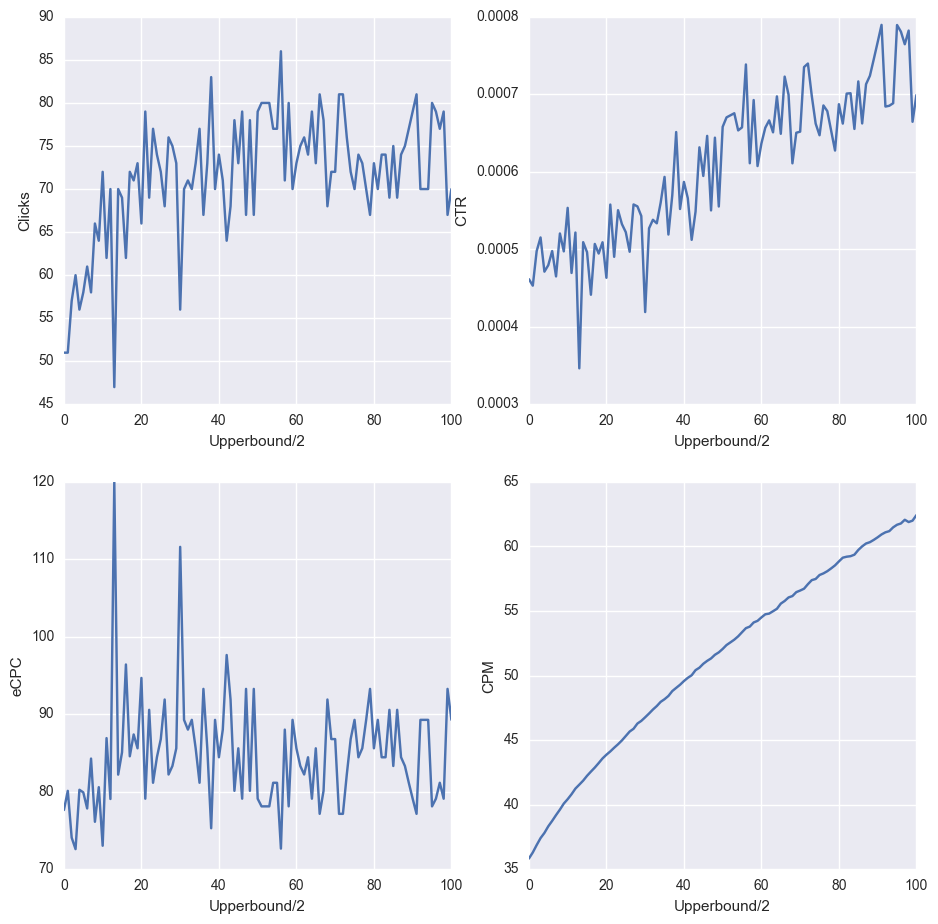

In [808]:
eva_plot(random,'Upperbound/2')

In [809]:
random.ix[(random['clicks']==random['clicks'].max())]

,upperbound,imps_won,total_spend,clicks,ad_go_through,CTR,eCPC,CPM
56,212,116447.0,6250004.0,86,185444,0.000739,72.674465,53.672521


In [810]:
random.ix[(random['CTR']==random['CTR'][:].max())]

,upperbound,imps_won,total_spend,clicks,ad_go_through,CTR,eCPC,CPM
91,282,102581.0,6250047.0,81,144077,0.00079,77.161074,60.92792


In [811]:
df_val_rand = df_validation_original.copy()

In [812]:
random_list = [randrange(0,168) for i in range(len(df_validation_original))]

In [813]:
df_val_rand['bidprice'] = random_list

In [814]:
evaluate_result(df_val_rand[:118569])

,click,Imps,cost,CPM,CTR,eCPC
advertiser,,,,,,
1458,11.0,14426,658.0,47.03,0.076%,59.82
2259,NaN,3222,NaN,43.05,0.0%,NaN
2261,1.0,2713,51.0,39.38,0.037%,51.00
2821,2.0,5268,63.0,41.61,0.038%,31.50
2997,5.0,1514,149.0,33.87,0.33%,29.80
3358,4.0,6586,368.0,55.06,0.061%,92.00
3386,5.0,12682,270.0,47.57,0.039%,54.00
3427,12.0,10858,796.0,52.21,0.111%,66.33
3476,6.0,8601,317.0,50.18,0.07%,52.83


## Linear strategy

In [816]:
# predbid = basebid * pCTR / avgCTR

In [817]:
df_val_pctr['advertiser'] = df_validation_original['advertiser']

In [818]:
def div(data):
    return data['pCTR']/all_avgCTR[data['advertiser']]

In [819]:
df_val_pctr['division'] = df_val_pctr.apply(div,axis=1)

In [820]:
df_val_pctr['division'].describe()

count    299749.000000
mean          1.015117
std           1.988636
min           0.011941
25%           0.393051
50%           0.686194
75%           1.144175
max         217.127530
Name: division, dtype: float64

In [991]:
def linear_bidding(constant,adv):
    ad_go_through = -1
    impression = 0.0
    clicks = 0
    cost = 0.0
#     click_cost = 0.0
    budget = 25000000
    
    budget = budget / 4
    
    for click, pay_price in df_validation_original.ix[(df_validation_original['advertiser']==adv)][['click','payprice']].values:
        ad_go_through += 1
        if constant[ad_go_through] > pay_price:
            impression += 1.0
            clicks += click
#             if click == 1:
#                 click_cost += pay_price
            cost += pay_price
        if cost >= budget:
            break
    return impression, clicks, cost, ad_go_through

In [992]:
bp = {}
basebid = {}
for adv in df_train['advertiser'].unique():

    const = pd.DataFrame()
    const['base_bid'] = np.arange(0,302,2)

    im = []
    clks = []
    ct = []
#     cc = []
    agt = []
    for base_bid in const['base_bid']:

        bid_price = base_bid * df_val_pctr.ix[(df_val_pctr['advertiser']==adv)]['division']

        [imps, clicks, cost, ad_go_through] = linear_bidding(bid_price.reset_index(drop=1),adv)
        im.append(imps)
        clks.append(clicks)
        ct.append(cost)
#         cc.append(click_cost)
        agt.append(ad_go_through)
    const['imps_won'] = im
    const['total_spend'] = ct
#     const['cost'] = cc
    const['clicks'] = clks
    const['ad_go_through'] = agt
    const['CTR'] = const['clicks']/const['imps_won']
    
    basebid[adv] = const.ix[(const['clicks']==const['clicks'].max())].reset_index()['base_bid'][0]
    bp[adv] = basebid[adv] * df_val_pctr.ix[(df_val_pctr['advertiser']==adv)]['division']

In [993]:
val_pred_bid_price = pd.concat([bp[1458],bp[3476],bp[3427],bp[3358],bp[2259],bp[2821],bp[3386],bp[2997],bp[2261]]).sort_index()

In [994]:
basebid

{1458: 280,
 2259: 284,
 2261: 248,
 2821: 288,
 2997: 264,
 3358: 296,
 3386: 242,
 3427: 298,
 3476: 272}

In [995]:
df_val_linear = df_validation_original.copy()

In [996]:
df_val_linear['bidprice'] = val_pred_bid_price

In [827]:
ad_go_through = -1
impression = 0.0
clicks = 0
cost = 0.0
# click_cost = 0.0
budget = 25000 * 1000

budget = budget/8

for click, pay_price in df_validation_original[['click','payprice']].values:
    ad_go_through += 1
    if val_pred_bid_price[ad_go_through] > pay_price:
        impression += 1.0
        clicks += click
#         if click == 1:
#             click_cost += pay_price
        cost += pay_price
    if cost >= budget:
        break
    if ad_go_through == 299749:
        break

In [828]:
linear_report = {}
linear_report.update({"click":clicks})
linear_report.update({"impression":impression})
linear_report.update({"ad_go_through":ad_go_through})
linear_report.update({"Total_spend":cost})
# linear_report.update({"cost":click_cost})
linear_report.update({"CTR":clicks/impression})
linear_report.update({"CPM":cost/impression})

In [829]:
linear_report

{'CPM': 66.904022779335889,
 'CTR': 0.00098482091245798457,
 'Total_spend': 3125020.0,
 'ad_go_through': 56205,
 'click': 46,
 'impression': 46709.0}

In [830]:
evaluate_result(df_val_linear[:54704])

,click,Imps,cost,CPM,CTR,eCPC
advertiser,,,,,,
1458,13.0,9543,1294.0,58.96,0.136%,99.54
2259,2.0,1999,316.0,64.67,0.1%,158.00
2261,NaN,1901,NaN,68.81,0.0%,NaN
2821,NaN,3728,NaN,72.82,0.0%,NaN
2997,5.0,976,257.0,52.12,0.512%,51.40
3358,3.0,5245,210.0,79.98,0.057%,70.00
3386,3.0,8461,207.0,64.92,0.035%,69.00
3427,12.0,8021,1241.0,69.94,0.15%,103.42
3476,6.0,5571,331.0,65.95,0.108%,55.17


## Best Strategy: ORTB

In [831]:
lambda_range = [1e-10,5e-10,1e-9,5e-9,1e-8,5e-8,1e-7,5e-7,1e-6,5e-6,1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2,5e-2,1e-1,5e-1]
c_range = [20,50,80]

ortbbids = []
clambda = []

for c in c_range:
    for lambdas in lambda_range:
        clambda.append((c,lambdas))
        ortbbid = np.sqrt((c / lambdas * np.asarray(df_val_pctr.pCTR)+ c**2))  - c
        ortbbids.append(ortbbid.tolist())

In [986]:
def ORTB_bidding(bids):
    ad_go_through = -1
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 25000000
    
    budget = budget / 4
    
    for click, pay_price in df_validation_original[['click','payprice']].values:
        ad_go_through += 1
        if bids[ad_go_through] > pay_price:
            impression += 1.0
            clicks += click

            cost += pay_price
        if cost >= budget:
            break
    return impression, clicks, cost, ad_go_through

In [987]:
ortb = pd.DataFrame()
ortb['C,Lambda'] = clambda

im = []
clks = []
ct = []
agt = []

for bid in ortbbids:
    [imps, clicks, cost, ad_go_through] = ORTB_bidding(bid)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
    agt.append(ad_go_through)

In [988]:
ortb['imps_won'] = im
ortb['total_spend'] = ct
ortb['clicks'] = clks
ortb['ad_go_through'] = agt
ortb['CTR'] = (ortb['clicks']/ortb['imps_won'] * 100).round(4).astype(str) + '%'
ortb['CPM'] = (ortb['total_spend']/ortb['imps_won']).round(2)
ortb['CPC'] = ((ortb['total_spend']/ortb['clicks'])/1000).round(2)

In [989]:
ortb.iloc[np.where(ortb.clicks == ortb.clicks.max())[0]]

,"C,Lambda",imps_won,total_spend,clicks,ad_go_through,CTR,CPM,CPC
8,"(20, 1e-06)",128715.0,6250003.0,95,213574,0.0738%,48.56,65.79


In [836]:
ortb.iloc[np.where(ortb.clicks == ortb.clicks.max())[0]].index[0]

28

In [838]:
df_val_ortb = df_validation_original.copy()